In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.DataFrame({
    'weather':['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy'],
    'temperature':['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild'],
    'play':['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']
})

In [3]:
features = ['weather','temperature']
target = 'play'

X = df[ features ]
y = df[ target ]

## Treinamento Naive Bayes

In [4]:
from sklearn.preprocessing import LabelEncoder

X_encoded = pd.DataFrame();

for feature in X.columns:
    X_encoded[feature] = LabelEncoder().fit_transform(X[feature].to_numpy())

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.30)

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
nb_pred = naive_bayes_model.predict(X_test)

print( classification_report(y_test, nb_pred) )

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.50      0.67         4

    accuracy                           0.60         5
   macro avg       0.67      0.75      0.58         5
weighted avg       0.87      0.60      0.63         5



## Treinamento Árvore de Decisão

In [6]:
X_one_hot = pd.get_dummies(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.30)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dtree_model = DecisionTreeClassifier(criterion='gini', min_samples_split=3)
dtree_model.fit(X_train, y_train)
dtree_pred = dtree_model.predict(X_test)

print( classification_report(y_test, dtree_pred) )

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



[Text(186.0, 190.26, 'weather_Sunny <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(111.60000000000001, 135.9, 'weather_Overcast <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(74.4, 81.53999999999999, 'temperature_Mild <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(37.2, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(111.60000000000001, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(148.8, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(260.40000000000003, 135.9, 'temperature_Cool <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(297.6, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

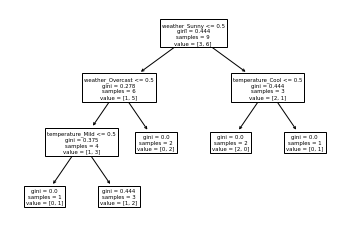

In [9]:
from sklearn import tree
import graphviz

tree.plot_tree(dtree_model, feature_names=X_one_hot.columns)